In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

578

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# # Create an empty list to hold the weather data.
# city_data = []
# # Print the beginning of the logging.
# print("Beginning Data Retrieval     ")
# print("-----------------------------")

# # Create counters.
# record_count = 1
# set_count = 1

In [10]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | brotas
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | muros
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | labuan
Processing Record 10 of Set 1 | san rafael
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | los llanos de aridane
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | rungata
City not found. Skipping...
Processing Record 18 of Set 1 | balkanabat
Processing Record 19 of Set 1 | synya
Processing Record 20 of Set 1 | querfurt
Processing Record 21 of Set 1 |

Processing Record 37 of Set 4 | hirara
Processing Record 38 of Set 4 | san carlos de bariloche
Processing Record 39 of Set 4 | bubaque
Processing Record 40 of Set 4 | souillac
Processing Record 41 of Set 4 | ushtobe
Processing Record 42 of Set 4 | arraial do cabo
Processing Record 43 of Set 4 | altay
Processing Record 44 of Set 4 | kahului
Processing Record 45 of Set 4 | havelock
Processing Record 46 of Set 4 | mandurah
Processing Record 47 of Set 4 | pathein
Processing Record 48 of Set 4 | jeremie
Processing Record 49 of Set 4 | gao
Processing Record 50 of Set 4 | erenhot
Processing Record 1 of Set 5 | rundu
Processing Record 2 of Set 5 | aksarka
Processing Record 3 of Set 5 | abengourou
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | cabedelo
Processing Record 6 of Set 5 | saint-philippe
Processing Record 7 of Set 5 | astipalaia
City not found. Skipping...
Processing Record 8 of Set 5 | hithadhoo
Processing Record 9 of Set 5 | bethel
Processing Record 10 

Processing Record 26 of Set 8 | gunjur
Processing Record 27 of Set 8 | port pirie
Processing Record 28 of Set 8 | dunyapur
Processing Record 29 of Set 8 | killybegs
Processing Record 30 of Set 8 | cheney
Processing Record 31 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 32 of Set 8 | kavaratti
Processing Record 33 of Set 8 | college
Processing Record 34 of Set 8 | dolores
Processing Record 35 of Set 8 | kenora
Processing Record 36 of Set 8 | dabakala
Processing Record 37 of Set 8 | paytug
City not found. Skipping...
Processing Record 38 of Set 8 | half moon bay
Processing Record 39 of Set 8 | christchurch
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | anse-bertrand
Processing Record 42 of Set 8 | havre-saint-pierre
Processing Record 43 of Set 8 | qandala
Processing Record 44 of Set 8 | wanganui
Processing Record 45 of Set 8 | bourail
Processing Record 46 of Set 8 | zhigansk
Processing Record 47 of Set 8 | cockburn town
Processing Record 

Processing Record 10 of Set 12 | aranda de duero
Processing Record 11 of Set 12 | port hawkesbury
Processing Record 12 of Set 12 | prainha
Processing Record 13 of Set 12 | ercis
Processing Record 14 of Set 12 | araouane
Processing Record 15 of Set 12 | puerto plata
Processing Record 16 of Set 12 | solano
Processing Record 17 of Set 12 | baoro
Processing Record 18 of Set 12 | wageningen
Processing Record 19 of Set 12 | shitanjing
Processing Record 20 of Set 12 | acandi
Processing Record 21 of Set 12 | altamont
Processing Record 22 of Set 12 | zaozerne
Processing Record 23 of Set 12 | williams lake
Processing Record 24 of Set 12 | san felipe
Processing Record 25 of Set 12 | tamsalu
Processing Record 26 of Set 12 | campbell river
Processing Record 27 of Set 12 | merrill
Processing Record 28 of Set 12 | aflu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaanaaq,77.4840,-69.3632,-13.29,57,2,8.99,GL,2022-01-17 16:16:50
1,Pevek,69.7008,170.3133,-29.40,100,18,3.29,RU,2022-01-17 16:12:17
2,Brotas,-22.2842,-48.1267,78.40,70,30,6.13,BR,2022-01-17 16:16:50
3,Ushuaia,-54.8000,-68.3000,47.82,65,75,26.46,AR,2022-01-17 16:16:37
4,Mataura,-46.1927,168.8643,57.47,91,3,1.88,NZ,2022-01-17 16:16:50
5,Iqaluit,63.7506,-68.5145,-6.07,83,100,4.00,CA,2022-01-17 16:16:51
6,Muros,42.7762,-9.0603,62.10,70,100,2.64,ES,2022-01-17 16:16:51
7,Puerto Ayora,-0.7393,-90.3518,82.36,76,78,7.20,EC,2022-01-17 16:16:51
8,Labuan,5.2767,115.2417,77.36,94,20,0.00,MY,2022-01-17 16:16:52
9,San Rafael,-34.6177,-68.3301,72.18,29,0,20.71,AR,2022-01-17 16:16:52


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed",]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-01-17 16:16:50,77.4840,-69.3632,-13.29,57,2,8.99
1,Pevek,RU,2022-01-17 16:12:17,69.7008,170.3133,-29.40,100,18,3.29
2,Brotas,BR,2022-01-17 16:16:50,-22.2842,-48.1267,78.40,70,30,6.13
3,Ushuaia,AR,2022-01-17 16:16:37,-54.8000,-68.3000,47.82,65,75,26.46
4,Mataura,NZ,2022-01-17 16:16:50,-46.1927,168.8643,57.47,91,3,1.88
...,...,...,...,...,...,...,...,...,...
519,Williams Lake,CA,2022-01-17 16:30:11,52.1415,-122.1445,36.97,97,75,1.01
520,San Felipe,VE,2022-01-17 16:30:11,10.3399,-68.7425,84.61,59,85,7.18
521,Tamsalu,EE,2022-01-17 16:30:12,59.1586,26.1153,25.79,64,34,17.98
522,Campbell River,CA,2022-01-17 16:30:12,50.0163,-125.2446,41.72,98,100,4.23


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

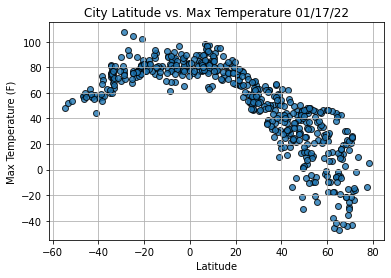

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

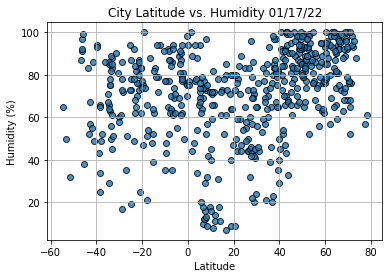

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

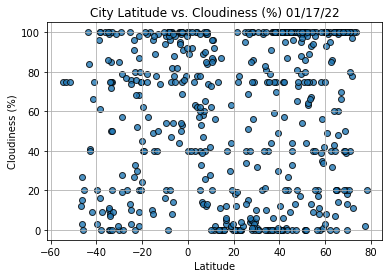

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

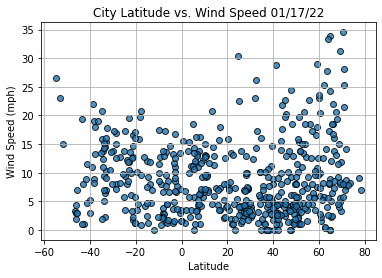

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()